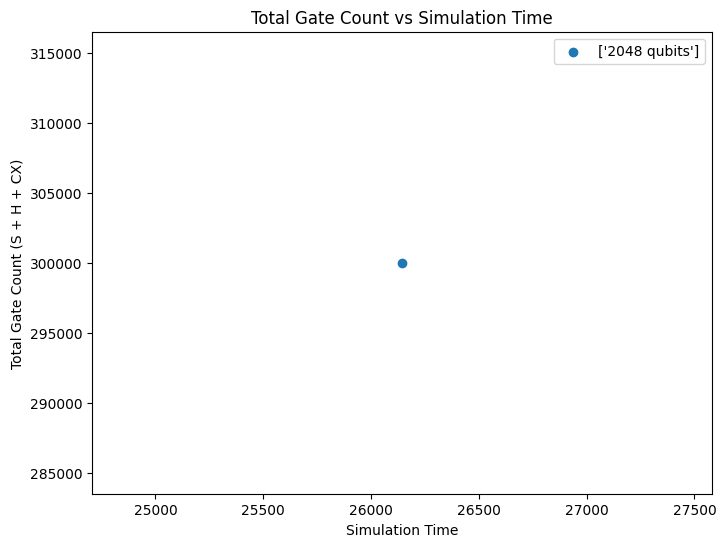

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

def read_and_label_file(filepath):
    with open(filepath, 'r') as f:
        lines = f.readlines()
    
    labels = ["sim_name", "sim_time", "n_qubits", "Scount", "Hcount", "CXcount"]
    data = {labels[i]: lines[i].strip() if i == 0 else float(lines[i]) for i in range(len(lines))}
    
    return data

def process_folder(folder_path):
    all_data = []
    
    for filename in os.listdir(folder_path):
        if filename.endswith(".txt"):  # Process only text files
            filepath = os.path.join(folder_path, filename)
            data = read_and_label_file(filepath)
            all_data.append(data)
    
    return all_data

def plot_data(all_data):
    sim_times = []
    total_counts = []
    labels = []
    
    for data in all_data:
        sim_times.append(data["sim_time"])
        total_counts.append(data["Scount"] + data["Hcount"] + data["CXcount"])
        labels.append(f"{int(data['n_qubits'])} qubits")
    
    plt.figure(figsize=(8, 6))
    plt.scatter(sim_times, total_counts, label=labels)
    plt.xlabel("Simulation Time")
    plt.ylabel("Total Gate Count (S + H + CX)")
    plt.legend()
    plt.title("Total Gate Count vs Simulation Time")
    plt.show()

# Example usage
folder_path = "sim_bench"  # Change this to your actual folder path
all_data = process_folder(folder_path)
plot_data(all_data)